## Week 2
### Metadata:

• SlNo <br>
• Release Date <br>
• MovieName – Name of the movie <br> 
• ReleaseTime – Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal) <br>
• Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc <br>
• Budget – Movie creation budget <br>
• BoxOfficeCollection – Box office collection <br>
• YoutubeViews – Number of views of the YouTube trailers <br>
• YoutubeLikes – Number of likes of the YouTube trailers <br>
• YoutubeDislikes – Number of dislikes of the YouTube trailers<br>

### Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv("bollywood.csv")
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


#### Total number of records in Dataset

In [3]:
print("No of records present in dataset is: ", df['SlNo'].count())

No of records present in dataset is:  149


#### Movies released in each genre

In [4]:
df['Genre'] = df['Genre'].str.strip()
print("Total movies released in each genre are:\n",df['Genre'].value_counts())

Total movies released in each genre are:
 Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64


#### Genre with highest number of releases

In [5]:
print("Genre with highest no. of releases: ", df['Genre'].value_counts(ascending = False).idxmax())

Genre with highest no. of releases:  Comedy


#### Number of movies released in each genre in different seasons

In [6]:
pd.crosstab(df['Genre'], df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


#### Month of the year which observes higest number of releases

In [7]:
import calendar
month = pd.to_datetime(df['Release Date'])
print("Month with max number of movie releases: ",calendar.month_name[(int(month.dt.month.max()))])

Month with max number of movie releases:  December


#### Month of the year which observes most highest budget movies(more than 25 crores)

In [8]:
#df['Release Date'] = pd.to_datetime(df['Release Date'])
data = df[['Release Date', 'Budget']]
data.iloc[0 : , 0] = pd.to_datetime(data['Release Date'])
data.iloc[0 : , 0] = data['Release Date'].dt.month
data = data.groupby('Release Date')['Budget'].apply(lambda x: x[x > 25].count())
data = pd.DataFrame(data)
mnth = data.idxmax()
print("Month with release of high budget movies:", calendar.month_name[int(mnth)])

Month with release of high budget movies: February


F:\edit_py\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### Movies with highest ROIs?

In [9]:
ROI = pd.DataFrame(((df['BoxOfficeCollection'] - df['Budget']) / df['Budget']))
indexROI = ROI.nlargest(10, 0).index
print("Top 10 movies with maximum ROI are:\n", df.iloc[indexROI, 2])

Top 10 movies with maximum ROI are:
 64                    Aashiqui 2
89                            PK
132                  Grand Masti
135                 The Lunchbox
87                        Fukrey
58                      Mary Kom
128                       Shahid
37     Humpty Sharma Ki Dulhania
101           Bhaag Milkha Bhaag
115              Chennai Express
Name: MovieName, dtype: object


#### Do movies have higher ROI if they get released on festive seasons or long weekend?

In [10]:
df['ROI'] = ROI
print("Average ROI of different festive seasons are:\n", df.groupby('ReleaseTime')['ROI'].mean())
largest2 = df.groupby('ReleaseTime')['ROI'].mean()
print("\nSeasons with highest ROIs are: ", largest2.nlargest(2))

Average ROI of different festive seasons are:
 ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

Seasons with highest ROIs are:  ReleaseTime
LW    1.127205
FS    0.973853
Name: ROI, dtype: float64


Movies have higher ROIs if they are released during Long Weekends or festive seasons.

#### Correlation between box office collection and youtube likes?

In [11]:
correlation = df['BoxOfficeCollection'].corr( df['YoutubeLikes'])
print("The correlation b/w box office collection & YouTube likes is: ", correlation)
if(correlation > 0):
    print("The correlation is positive")
else:
    print("The correlation is negative")

The correlation b/w box office collection & YouTube likes is:  0.6825165877731297
The correlation is positive


#### Visualizing genre of movie that typically sees more youtube likes.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

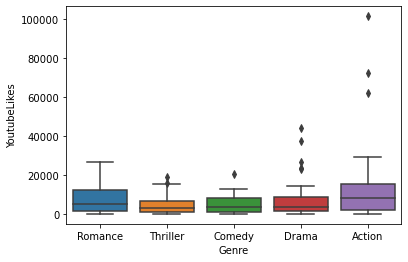

In [12]:
df['YoutubeLikes']
sns.boxplot(data = df, x = 'Genre', y = 'YoutubeLikes')

#### Q11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?

<AxesSubplot:>

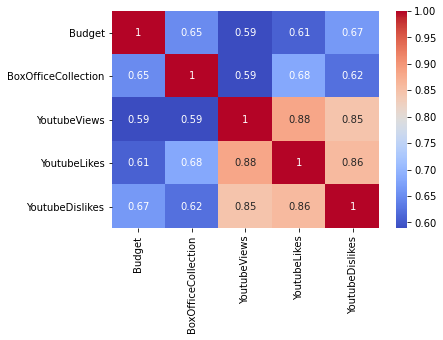

In [13]:
corr_mat = df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr()
sns.heatmap(corr_mat, annot = True, fmt = '.2g', cmap = 'coolwarm')

In [14]:
corr_mat

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Budget,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.665343,0.623941,0.846739,0.859730,1.000000


From the correlation matrix we can say that Youtube Views and Youtube Likes are highly correlated. Also More the Youtube Likes likely means there is good chance of high Box office collection

#### Highlighting & visualizing the genre of movies and theirbox office collection in the period of 2013-2015

F:\edit_py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

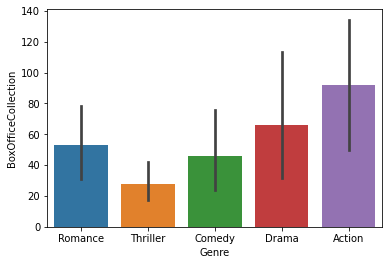

In [15]:
year = pd.DataFrame(df, columns =['Release Date', 'Genre', 'BoxOfficeCollection'])
year['Release Date'] = pd.to_datetime(year['Release Date'])
msk = (year['Release Date'].dt.year > 2012) & (year['Release Date'].dt.year < 2016)
year = year.loc[msk]
sns.barplot(year['Genre'], year['BoxOfficeCollection'])

#### Visualizing the Budget and Box office collection based on Genre

<AxesSubplot:xlabel='Genre'>

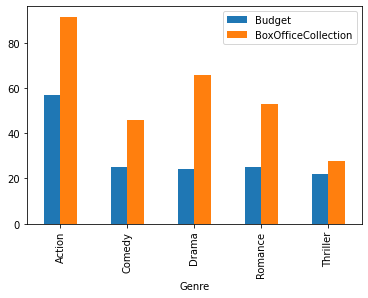

In [16]:
a = df.groupby('Genre')[['Budget', 'BoxOfficeCollection']].agg('mean')
a.plot(kind = 'bar')

#### Distribution of movie budget for every Genre

Genre
Action      AxesSubplot(0.125,0.125;0.775x0.755)
Comedy      AxesSubplot(0.125,0.125;0.775x0.755)
Drama       AxesSubplot(0.125,0.125;0.775x0.755)
Romance     AxesSubplot(0.125,0.125;0.775x0.755)
Thriller    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Budget, dtype: object

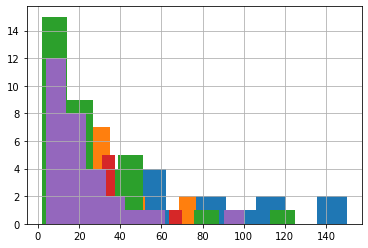

In [17]:
dist = df.groupby('Genre')['Budget']
dist.hist()

#### Number of movies released every year from 2013 to 2015

In [18]:
moviesReleased = df[['Release Date', 'MovieName']]
moviesReleased['Release Date'] = pd.to_datetime(moviesReleased['Release Date'])
moviesReleased['Release Date'] = moviesReleased['Release Date'].dt.year
mcount = moviesReleased.groupby('Release Date')['MovieName'].count()
mcount

<ipython-input-18-143527404b35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesReleased['Release Date'] = pd.to_datetime(moviesReleased['Release Date'])
<ipython-input-18-143527404b35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesReleased['Release Date'] = moviesReleased['Release Date'].dt.year


Release Date
2013    67
2014    70
2015    12
Name: MovieName, dtype: int64

<AxesSubplot:xlabel='Release Date'>

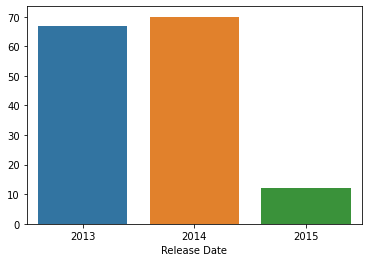

In [19]:
sns.barplot(x = mcount.index, y = mcount.values)

#### Extra knowledge

In [20]:
print("Movie with highest box office collection: ",df.iloc[df['BoxOfficeCollection'].idxmax(), 2])
print("Movie with lowest box office collection: ",df.iloc[df['BoxOfficeCollection'].idxmin(), 2])

Movie with highest box office collection:  PK
Movie with lowest box office collection:  Gangoobai
